In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from env import user, password, host
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as a
from collections import Counter
import prepare as p

## Spam Data

## Load the spam data set.

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
   
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [4]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels


,n,percent
ham,4825,0.865937
spam,747,0.134063


In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))


## Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [6]:
def generate_bigrams(text):
    words = text
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        bigram = " ".join(words[i:i+2])
        bigrams.append(bigram)

    return bigrams

In [7]:
all_text = all_words
spam_text = spam_words
ham_text = ham_words

In [8]:
all_bigrams = generate_bigrams(all_text)
spam_bigrams = generate_bigrams(spam_text)
ham_bigrams = generate_bigrams(ham_text)

In [9]:
all_df = pd.DataFrame({'All Bigrams': all_bigrams})
spam_df = pd.DataFrame({'Spam Bigrams': spam_bigrams})
ham_df = pd.DataFrame({'Ham Bigrams': ham_bigrams})

In [10]:
all_freq = all_df['All Bigrams'].value_counts()
ham_freq = ham_df['Ham Bigrams'].value_counts()
spam_freq = spam_df['Spam Bigrams'].value_counts()

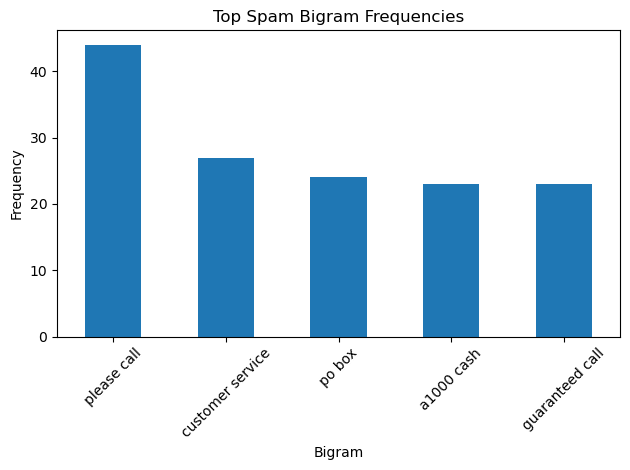

In [11]:
top_spam_freq = spam_freq.head()
top_spam_freq.plot(kind='bar', title='Top Spam Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

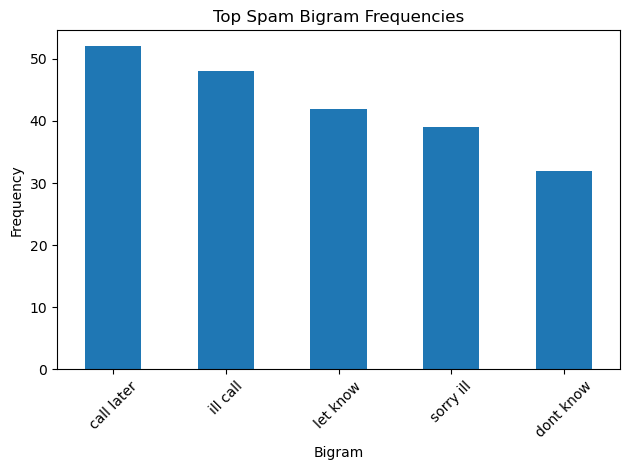

In [12]:
top_ham_freq = ham_freq.head()
top_ham_freq.plot(kind='bar', title='Top Spam Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

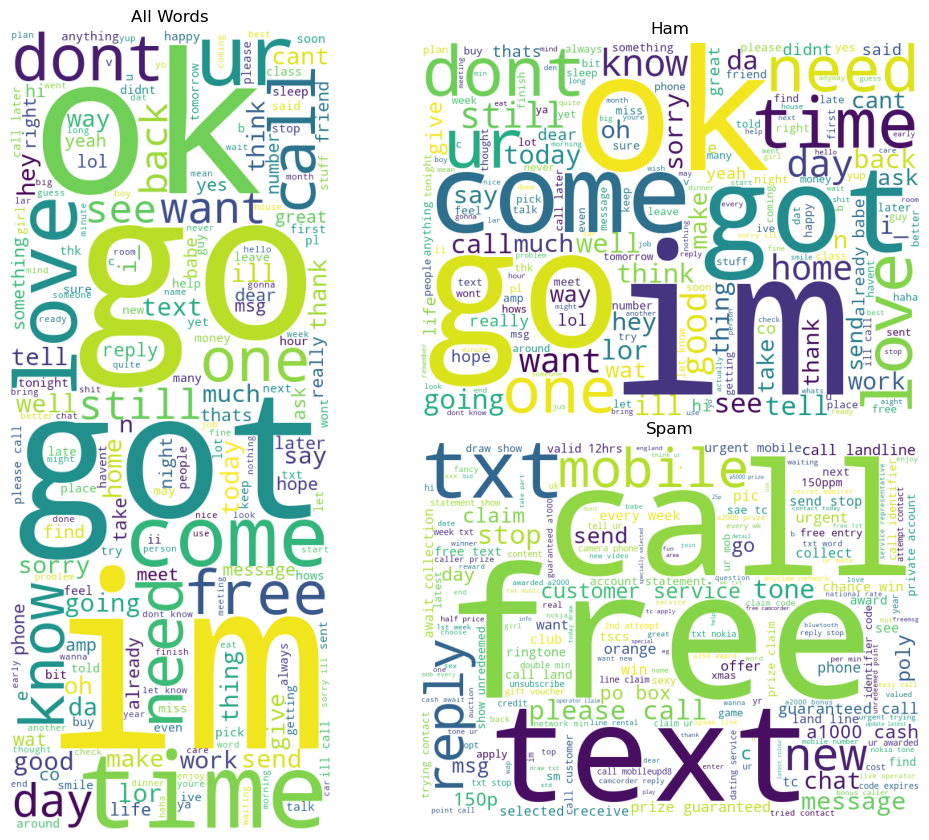

In [13]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')


## Is there any overlap in the bigrams for the spam data and the ham data?

In [14]:
spam_bigrams = generate_bigrams(spam_text)
ham_bigrams = generate_bigrams(ham_text)

In [15]:
spam_bigrams_set = set(spam_bigrams)
ham_bigrams_set = set(ham_bigrams)

In [16]:
overlap_bigrams = spam_bigrams_set.intersection(ham_bigrams_set)

In [17]:
overlap_bigrams

{'26th july',
 '3 hour',
 '3 week',
 '4 1',
 '4 free',
 '4 next',
 '4 ur',
 'anyone going',
 'babe im',
 'babe make',
 'baby im',
 'back id',
 'back work',
 'bill 3',
 'brand new',
 'call 4',
 'call back',
 'call call',
 'call cost',
 'call free',
 'call landline',
 'call text',
 'called left',
 'cant get',
 'chat dont',
 'come take',
 'could meet',
 'couple day',
 'customer service',
 'day fri',
 'day get',
 'day give',
 'day send',
 'day today',
 'dont forget',
 'dont know',
 'dont like',
 'dont miss',
 'dont tell',
 'enjoy one',
 'every week',
 'fall love',
 'first time',
 'free call',
 'free message',
 'free next',
 'game send',
 'get 3',
 'get free',
 'get phone',
 'get ur',
 'girl waiting',
 'give u',
 'go another',
 'go back',
 'go txt',
 'good friend',
 'got new',
 'great new',
 'great weekend',
 'hey got',
 'hey im',
 'hey really',
 'hi babe',
 'hi baby',
 'hi im',
 'hi ya',
 'hope enjoyed',
 'hope like',
 'hot sticky',
 'id like',
 'ill send',
 'im bored',
 'im glad',
 'im ho

## Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [18]:
def generate_trigrams(text):
    words = text
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 2):
        trigram = " ".join(words[i:i+3])
        trigrams.append(trigram)

    return trigrams

In [19]:
spam_trigrams = generate_trigrams(spam_words)
ham_trigrams = generate_trigrams(ham_words)

In [20]:
spam_df = pd.DataFrame({'Spam Trigrams': spam_trigrams})
ham_df = pd.DataFrame({'Ham Trigrams': ham_trigrams})

In [21]:
spam_df.head()

,Spam Trigrams
0,free entry wkly
1,entry wkly comp
2,wkly comp win
3,comp win fa
4,win fa cup


In [22]:
ham_freq =ham_df.value_counts()
spam_freq = spam_df.value_counts()


spam_freq.head()

Spam Trigrams         
prize guaranteed call     21
call customer service     15
reply call 08000930705    14
land line claim           14
private 2003 account      13
dtype: int64

In [23]:
ham_freq.head()

Ham Trigrams    
ill call later      42
sorry ill call      38
happy new year      19
pls send message    13
right pls send      12
dtype: int64

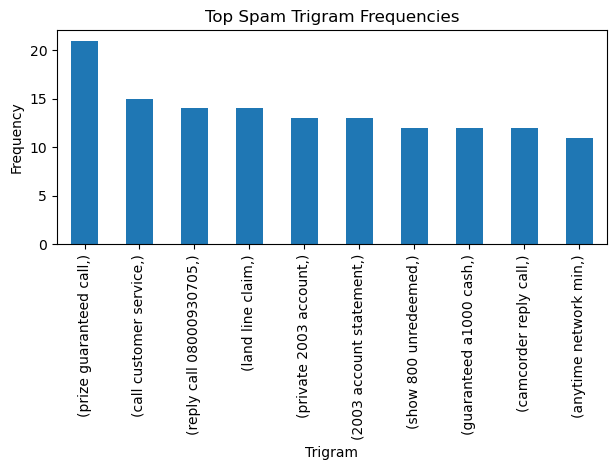

In [24]:
top_spam_freq = spam_freq.head(10)
top_spam_freq.plot(kind='bar', title='Top Spam Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

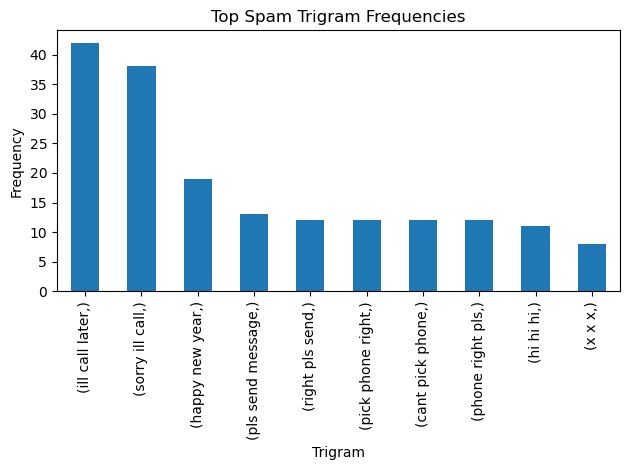

In [25]:
top_ham_freq = ham_freq.head(10)
top_ham_freq.plot(kind='bar', title='Top Spam Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Explore the blog articles using the techniques discussed in the exploration lesson.

In [41]:
blog_data = pd.read_csv('articles.csv')

In [42]:
blog_data

,title,content
0,How I Paid $43 For My Codeup Tuition,"Nov 27, 2019 | Alumni Stories Bootcamps or car..."
1,Women in tech: Panelist Spotlight – Magdalena ...,"Mar 28, 2023 | Events, Featured Codeup is host..."
2,Women in tech: Panelist Spotlight – Rachel Rob...,"Mar 20, 2023 | Events, Featured Codeup is host..."
3,Women in Tech: Panelist Spotlight – Sarah Mellor,"Mar 13, 2023 | Codeup News, Featured Codeup is..."
4,Women in Tech: Panelist Spotlight – Madeleine ...,"Mar 6, 2023 | Events, Featured Codeup is hosti..."
5,Black Excellence in Tech: Panelist Spotlight –...,"Feb 16, 2023 | Codeup News, Events, Featured ..."


In [43]:
blog_data['title'] = blog_data['title'].apply(clean)

In [44]:
blog_data['content'] = blog_data['content'].apply(clean)

In [47]:
word_freq = Counter()
for content in blog_data['content']:
    words = content
    word_freq.update(words)

<Axes: xlabel='Word'>

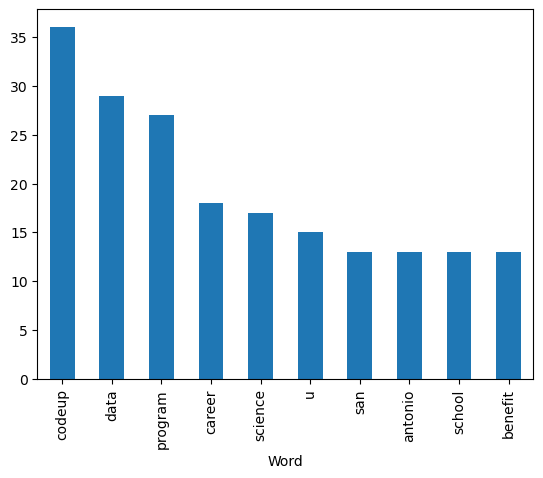

In [48]:
common_words = word_freq.most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df.plot(x='Word', y='Frequency', kind='bar', legend=None)

## Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [65]:
df = pd.read_csv('inshorts_articles.csv')

In [66]:
df = df.drop(columns=['author', 'time', 'day', 'category'])

In [71]:
headline_words = clean(' '.join(df['headline']))
summary_words = clean(' '.join(df['summary']))
all_words = clean(' '.join(df))

In [73]:
all_text = all_words
summary_text = summary_words
headline_text = headline_words

In [74]:
all_bigrams = generate_bigrams(all_text)
summary_bigrams = generate_bigrams(summary_text)
headline_bigrams = generate_bigrams(headline_text)

In [75]:
all_df = pd.DataFrame({'All Bigrams': all_bigrams})
summary_df = pd.DataFrame({'Summary Bigrams': summary_bigrams})
headline_df = pd.DataFrame({'Headline Bigrams': headline_bigrams})

In [77]:
all_freq = all_df['All Bigrams'].value_counts()
headline_freq = headline_df['Headline Bigrams'].value_counts()
summary_freq = summary_df['Summary Bigrams'].value_counts()

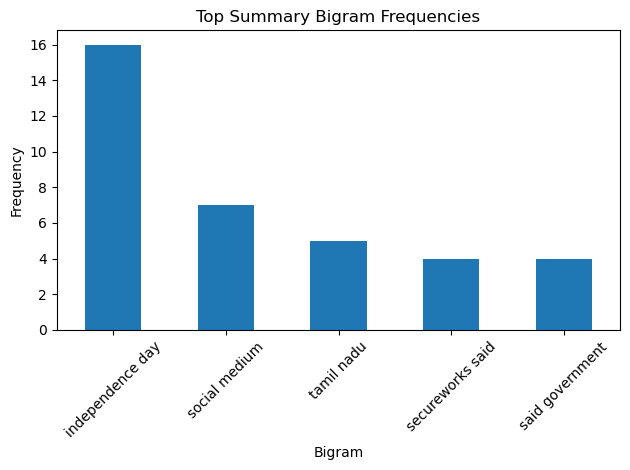

In [78]:
top_summary_freq = summary_freq.head()
top_summary_freq.plot(kind='bar', title='Top Summary Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

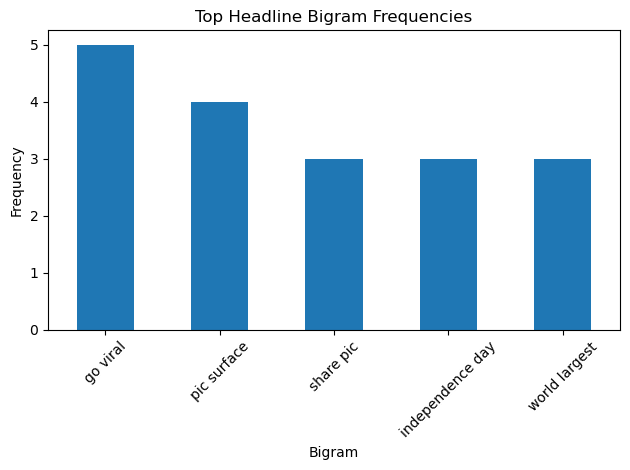

In [79]:
top_headline_freq = headline_freq.head()
top_headline_freq.plot(kind='bar', title='Top Headline Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

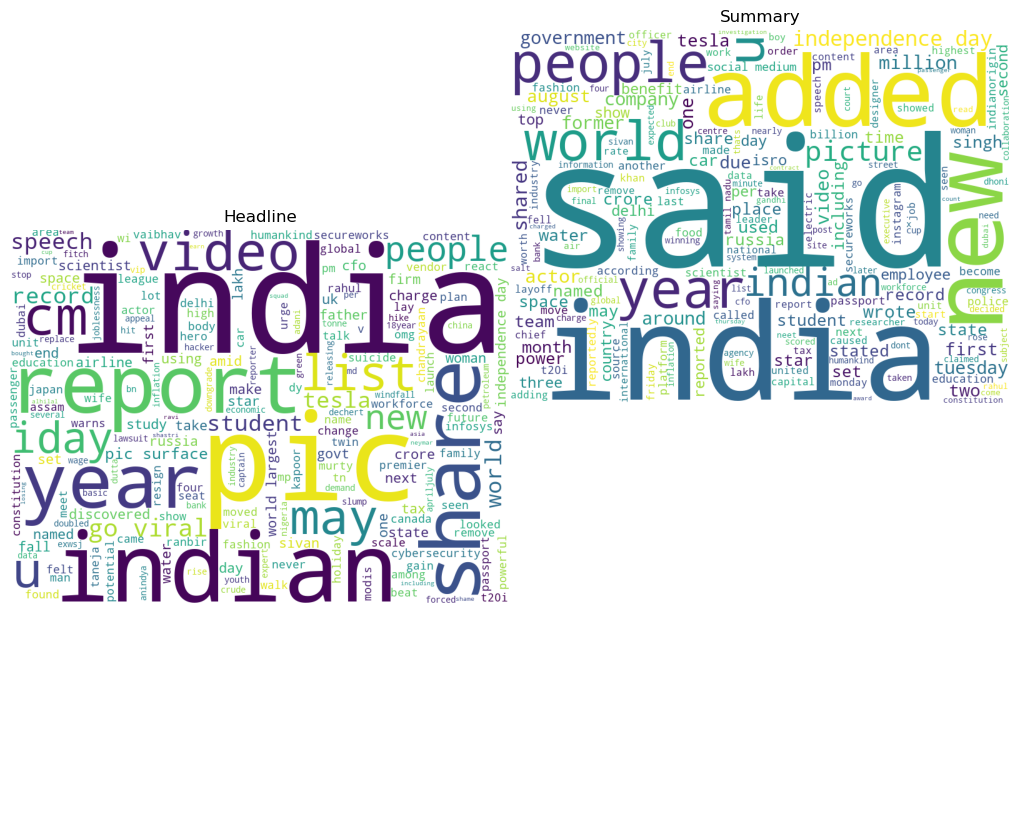

In [81]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
headline_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(headline_words))
summary_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(summary_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]


axs[0].imshow(headline_cloud)
axs[1].imshow(summary_cloud)


axs[0].set_title('Headline')
axs[1].set_title('Summary')

for ax in axs: ax.axis('off')


In [82]:
summary_bigrams = generate_bigrams(summary_text)
headline_bigrams = generate_bigrams(headline_text)

In [83]:
summary_bigrams_set = set(summary_bigrams)
headline_bigrams_set = set(headline_bigrams)

In [84]:
overlap_bigrams = summary_bigrams_set.intersection(headline_bigrams_set)

In [85]:
overlap_bigrams

{'100 million',
 '100 year',
 '135 new',
 '13yearold boy',
 '15 workforce',
 '15000 foot',
 '17 second',
 '2023 list',
 '2500 crore',
 '330 employee',
 '50 lakh',
 '500 student',
 '52 lakh',
 '55 day',
 '7100 per',
 '85 billion',
 '87 crore',
 '900 crore',
 'abhishek malhan',
 'academic year',
 'actor aarush',
 'ad unit',
 'adani green',
 'aged 26',
 'aim completely',
 'airline may',
 'akshata murty',
 'amendment bill',
 'anamika khanna',
 'anindya dutta',
 'apology note',
 'ariana viera',
 'asia cup',
 'assam cm',
 'assembly speaker',
 'asteroid impact',
 'banned content',
 'basic wage',
 'beard living',
 'beauty queen',
 'become one',
 'bharti airtel',
 'billiards premier',
 'biodegradable plastic',
 'body burn',
 'bowling change',
 'bring strong',
 'buy michael',
 'canada fined',
 'cancer treatment',
 'car crash',
 'cartrade tech',
 'certificate program',
 'child actor',
 'completely withdraw',
 'computer science',
 'constitution state',
 'contract agreement',
 'cool ranbir',
 'coun

In [93]:
summary_trigrams = generate_trigrams(summary_words)
headline_trigrams = generate_trigrams(headline_words)

In [94]:
summary_df = pd.DataFrame({'Summary Trigrams': summary_trigrams})
headline_df = pd.DataFrame({'Headline Trigrams': headline_trigrams})

In [96]:
headline_freq = headline_df['Headline Trigrams'].value_counts()
summary_freq = summary_df['Summary Trigrams'].value_counts()

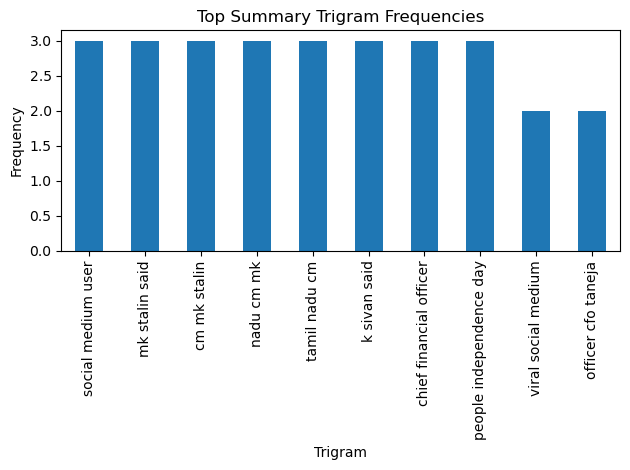

In [99]:
top_summary_freq = summary_freq.head(10)
top_summary_freq.plot(kind='bar', title='Top Summary Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

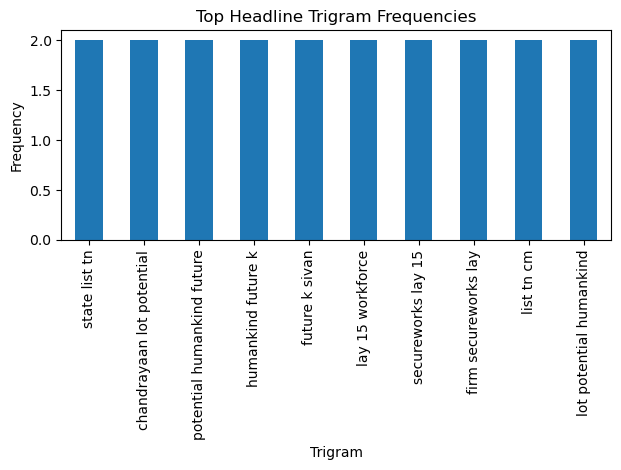

In [98]:
top_headline_freq = headline_freq.head(10)
top_headline_freq.plot(kind='bar', title='Top Headline Trigram Frequencies')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [103]:
top_20_summary_trigrams = (pd.Series(nltk.ngrams(summary_words, 3))
                      .value_counts()
                      .head(20))

top_20_summary_trigrams.head()


(social, medium, user)    3
(mk, stalin, said)        3
(cm, mk, stalin)          3
(nadu, cm, mk)            3
(tamil, nadu, cm)         3
dtype: int64

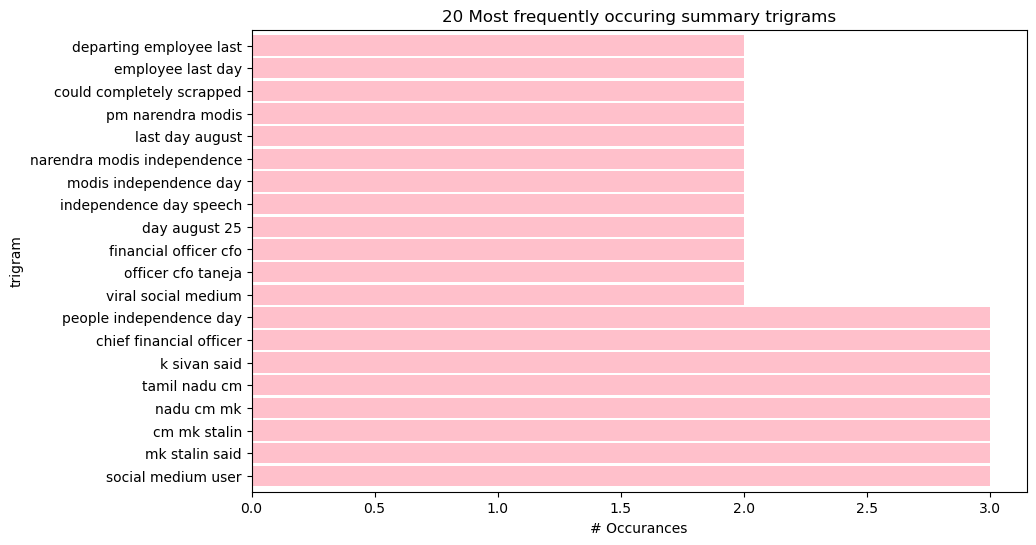

In [110]:
top_20_summary_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring summary trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')


ticks, _ = plt.yticks()
labels = top_20_summary_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)


In [108]:
top_20_headline_trigrams = (pd.Series(nltk.ngrams(headline_words, 3))
                      .value_counts()
                      .head(20))

top_20_headline_trigrams.head()

(state, list, tn)                 2
(chandrayaan, lot, potential)     2
(potential, humankind, future)    2
(humankind, future, k)            2
(future, k, sivan)                2
dtype: int64

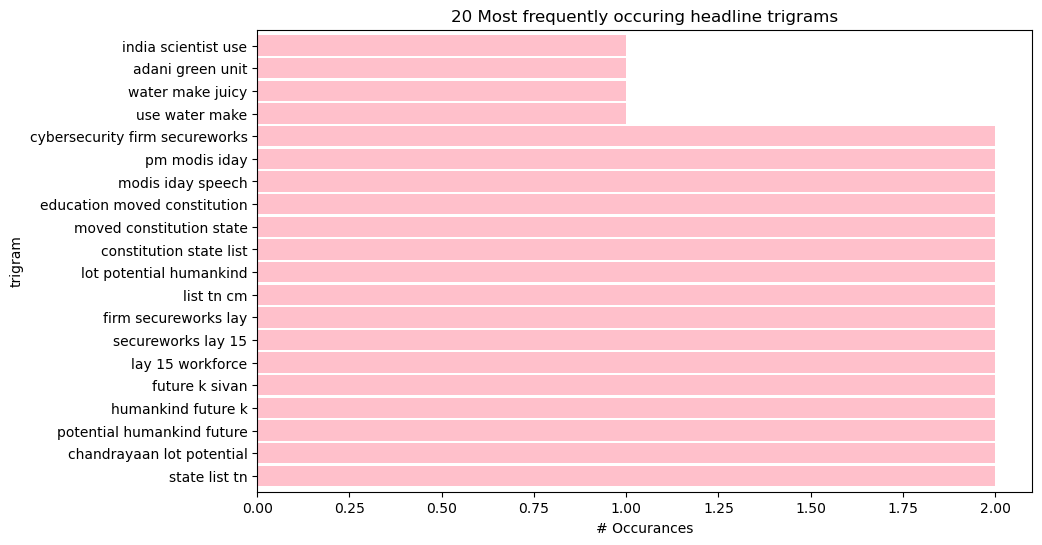

In [112]:
top_20_headline_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring headline trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')


ticks, _ = plt.yticks()
labels = top_20_headline_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)